Podgląd danych po konwersji (powinny być same liczby):
   x1  x2           y
0   1   2   11.118438
1   3   6  147.347351
2   5  10  300.234648
3   7  14   36.586305
4   9  18  469.589887
Wartości osobliwe S: [2.97878331e+03 1.93368602e-13]

Poprawione parametry (po stabilizacji):
a = 7.9560
b = 15.9120
Liczba warunkowa (przed obcięciem): 1.54e+16


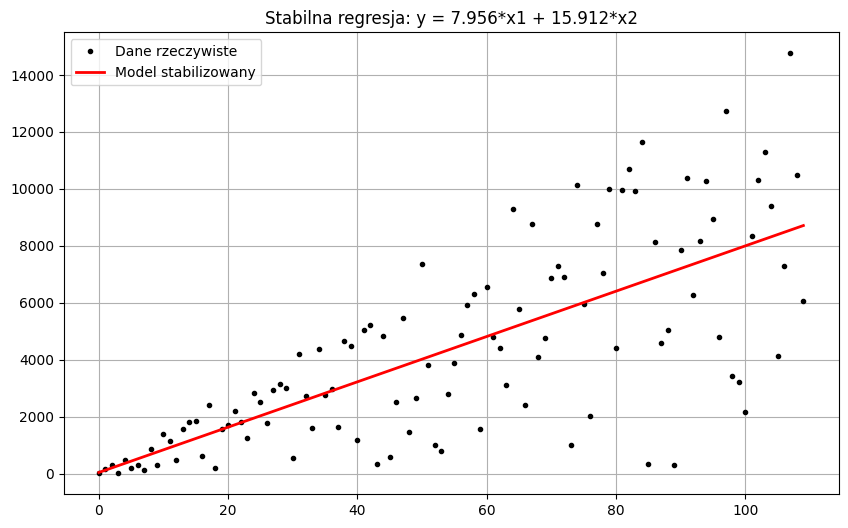

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Wczytanie danych z obsługą przecinków i wymuszeniem liczb 
file_path = 'war5.csv'

df = pd.read_csv(file_path, sep=None, engine='python', decimal=',')

#Konwersja wszystkich kolumn na typ float

df = df.apply(pd.to_numeric, errors='coerce')

# Usunięcie ewentualnych pustych wierszy (NaN)
df = df.dropna()

print("Podgląd danych po konwersji (powinny być same liczby):")
print(df.head())

# Przygotowanie macierzy
# .astype(float) gwarantuje, że nie mamy do czynienia z "sekwencją tekstową"
A = df.iloc[:, 0:2].values.astype(float)
b = df.iloc[:, 2].values.astype(float)

# SVD i Pseudoodwrotność ---
try:
    U, S, VT = np.linalg.svd(A, full_matrices=False)
    
    print(f"Wartości osobliwe S: {S}")
    
    # Próg obcinania (zgodnie z instrukcją kappanew)
    # Jeśli S[i] jest bardzo małe w stosunku do największej wartości, zamieniamy je na 0
    threshold = 1e-5 * S[0]
    S_inv_vec = np.array([1/s if s > threshold else 0 for s in S])
    S_inv = np.diag(S_inv_vec)
    
    # Ponowne obliczenie parametrów
    A_plus = VT.T @ S_inv @ U.T
    x_coeffs = A_plus @ b
    a_param, b_param = x_coeffs

    print(f"\nPoprawione parametry (po stabilizacji):")
    print(f"a = {a_param:.4f}")
    print(f"b = {b_param:.4f}")
    
    #Obliczenie liczby warunkowej
    kappa = S[0] / S[1]
    print(f"Liczba warunkowa (przed obcięciem): {kappa:.2e}")

    #Wykres
    plt.figure(figsize=(10, 6))
    plt.plot(b, 'ko', label='Dane rzeczywiste', markersize=3)
    plt.plot(A @ x_coeffs, 'r-', label='Model stabilizowany', linewidth=2)
    plt.title(f'Stabilna regresja: y = {a_param:.3f}*x1 + {b_param:.3f}*x2')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Błąd: {e}")